In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import matplotlib.image as mpimg

In [13]:
data = loadmat('ex3data1.mat')

In [14]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [15]:
X = data["X"]
y = data["y"]

l = X.shape[0]
b = X.shape[1]



In [16]:
y.shape


(5000, 1)

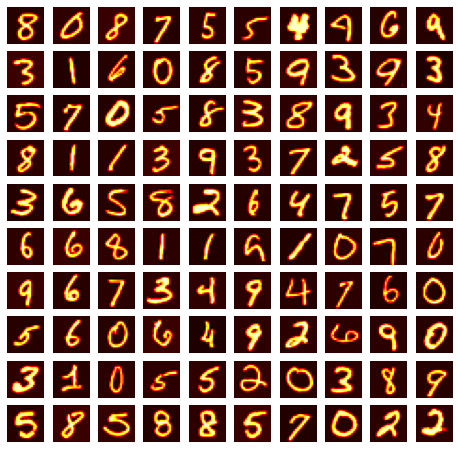

In [17]:
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"), cmap="hot") #reshape back to 20 pixel by 20 pixel
        axis[i,j].axis("off")




In [18]:
X = np.append(np.ones((l,1)), X, axis = 1)
def sigmoid(z):
    return 1/(1 + np.exp(-z))



In [19]:
def cost_Function(X, Y, theta, lamda):
    m = len(Y)
    small_value = np.full((1, 1) ,0.00000000000000000000000000000000001)
    
    h_x = sigmoid(np.dot(X, theta))#(100, 1)
    
    cost = (Y) * np.log(h_x+small_value) + (1 - Y) * np.log(1 - h_x + small_value)
    j = (-1/m) * sum(cost)
    
    reg_j = j + (lamda/(2*m)) * sum(theta[1:] ** 2)
    
    grad_term_zero = (1/m) * (np.dot(X.transpose(),(h_x - Y)))[0]
    grad_term_one  = (1/m)*(np.dot(X.transpose(),(h_x - Y)))[1:] + (lamda/m)*theta[1:]
    
    
    return reg_j[0], grad_term_zero, grad_term_one

In [20]:
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t =np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)), X_t))
y_t = np.array([1,0,1,0,1]).reshape(5,1)
J, grad1, grad2 = cost_Function(X_t, y_t,theta_t ,3)
print("Cost:",J,"Expected cost: 2.534819")
print("Gradients:\n",grad1, grad2, "\nExpected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")


Cost: 2.534819396109744 Expected cost: 2.534819
Gradients:
 [0.14656137] [[-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [21]:
def gradient_descent_all_theta(X, Y, theta, alpha, num_iter, lamda):
    
    j_history = []
    
    for i in range(num_iter):
        j, g0, g1 = cost_Function(X, Y, theta, lamda)
        theta[0] = theta[0] - alpha*g0
        theta[1:] = theta[1:] - alpha*g1
        j_history.append(j)
        
    return theta, j_history


In [22]:
np.where(y==10,1,0)

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [201]:
def OnevsAll(X, Y, num_labels, lamda):
    m = len(Y)   #5000 because 5000 sets of examples
    n = X.shape[1]
    all_theta = []
    all_j = []
    i_theta = np.ones((n,1))
    
    for i in range(1,num_labels+1):
        
        y1 = np.where(Y==i, 1, 0)
        theta, j = gradient_descent_all_theta(X, y1, i_theta, 1, 100, lamda)
        all_theta.extend(theta.copy())
        all_j.extend(j)
        #all_theta.append(theta)
    return np.array(all_theta).reshape(num_labels,n), all_j

In [202]:
a,b = OnevsAll(X, y, 10, 1)

1000

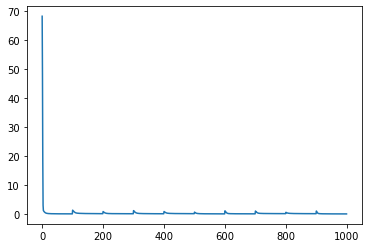

In [203]:
plt.plot(b)
len(b)

In [204]:
def predict_AllForOne(all_theta, X):
    fun = sigmoid(X@all_theta.T)
    return np.argmax(fun, axis=1)+1

In [205]:
pred = predict_AllForOne(a, X)
pred = pred.reshape(5000,1)
pred.shape


(5000, 1)

In [206]:
print("Training Set Accuracy:",sum(pred==y)[0]/5000*100,"%")

Training Set Accuracy: 88.7 %


In [199]:
a

array([[-1.91287089,  0.98019671,  0.98019671, ...,  0.9800191 ,
         0.97940699,  0.97768893],
       [ 0.9790714 ,  0.9801443 ,  0.98027496, ...,  0.98028519,
         0.98019125,  0.98019611],
       [ 0.98019671,  0.98019655,  0.9801979 , ...,  0.9767253 ,
         0.96647477,  0.96619187],
       ...,
       [ 0.69925945,  0.64178668,  0.62359451, ...,  0.82185338,
         0.81939805,  0.81892766],
       [ 0.81871438,  0.81870298,  0.81910941, ...,  0.81855307,
         0.81759935,  0.82111403],
       [ 0.82361845,  0.8110307 ,  0.79600586, ...,  0.81895264,
         0.81868767,  0.81871438]])

In [207]:
a

array([[-1.91287089,  0.98019671,  0.98019671, ...,  0.98019873,
         0.98019787,  0.98019671],
       [-2.70357917,  0.9607856 ,  0.9607856 , ...,  0.96117818,
         0.9607442 ,  0.9607856 ],
       [-3.14144054,  0.94175888,  0.94175888, ...,  0.94210743,
         0.94171795,  0.94175888],
       ...,
       [-3.51459931,  0.85213015,  0.85213015, ...,  0.85240928,
         0.85210123,  0.85213015],
       [-3.52640734,  0.83525517,  0.83525517, ...,  0.83552039,
         0.83522701,  0.83525517],
       [-3.71971186,  0.81871438,  0.81871438, ...,  0.81895264,
         0.81868767,  0.81871438]])

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

80.64

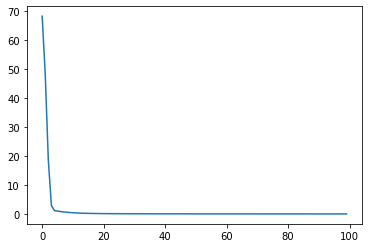

array([[100.],
       [  2.],
       [  1.],
       [ 99.],
       [  1.]])

array([[100.],
       [  2.],
       [  1.],
       [ 99.],
       [  1.]])